In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [43]:
train_dataset = keras.preprocessing.image_dataset_from_directory('trainval/', validation_split=0.4, subset="training", seed=123, batch_size=64, image_size=(200, 200))
print(len(train_dataset.class_names))


Found 5214 files belonging to 3 classes.
Using 3129 files for training.
3


In [44]:
test_dataset = keras.preprocessing.image_dataset_from_directory('trainval/', validation_split=0.4, subset="validation", seed=123, batch_size=64, image_size=(200, 200))

Found 5214 files belonging to 3 classes.
Using 2085 files for validation.


In [45]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,Rescaling,RandomFlip,RandomRotation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [46]:
vgg16_model = tensorflow.keras.applications.vgg16.VGG16()
model = Sequential()
for layer


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [48]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
49/49 [==============================] - 107s 2s/step - loss: 0.8708 - accuracy: 0.5980 - val_loss: 0.8060 - val_accuracy: 0.6101
Epoch 2/10
49/49 [==============================] - 106s 2s/step - loss: 0.7926 - accuracy: 0.6494 - val_loss: 0.7087 - val_accuracy: 0.7223
Epoch 3/10
49/49 [==============================] - 108s 2s/step - loss: 0.6552 - accuracy: 0.7245 - val_loss: 0.5488 - val_accuracy: 0.7770
Epoch 4/10
49/49 [==============================] - 120s 2s/step - loss: 0.4564 - accuracy: 0.8079 - val_loss: 0.3763 - val_accuracy: 0.8523
Epoch 5/10
49/49 [==============================] - 113s 2s/step - loss: 0.2960 - accuracy: 0.8853 - val_loss: 0.2091 - val_accuracy: 0.9175
Epoch 6/10
49/49 [==============================] - 108s 2s/step - loss: 0.1850 - accuracy: 0.9294 - val_loss: 0.1449 - val_accuracy: 0.9578
Epoch 7/10
49/49 [==============================] - 108s 2s/step - loss: 0.1176 - accuracy: 0.9581 - val_loss: 0.0768 - val_accuracy: 0.9760
Epoch 8/10
49

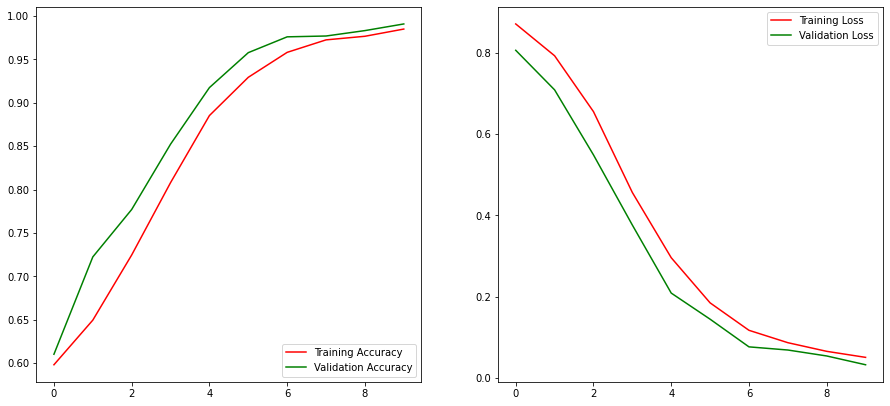

In [49]:
import matplotlib.pyplot as plt
def performance_graph():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(10)

    plt.figure(figsize=(40,40))
    plt.subplot(5,5,1)
    plt.plot(epochs_range,acc,c='red',label='Training Accuracy')
    plt.plot(epochs_range,val_acc,c='green',label='Validation Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(5,5,2)
    plt.plot(epochs_range,loss,c='red',label='Training Loss')
    plt.plot(epochs_range,val_loss,c='green',label='Validation Loss')
    plt.legend(loc='upper right')
performance_graph()


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)      

In [51]:
import os.path
if os.path.isfile('models/wildlife_monitoring.h5') is True:
    model.save('models/wildlife_monitoring.h5')
if os.path.isfile('models/wildlife_monitoring_weights.h5') is True:
    model.save_weights('models/wildlife_monitoring_weights.h5')

In [17]:
import matplotlib.pyplot as plt
len(train_dataset.class_names)
def display(display_list):
    plt.figure(figsize = (20,20))
    for images,labels in display_list.take(1):
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

NameError: name 'class_names' is not defined

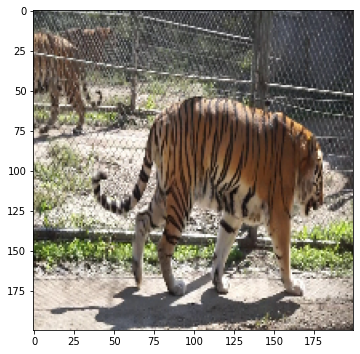

In [18]:
display(train_dataset)

In [52]:
from tensorflow.keras.models import load_model 
pretrained_model=load_model('models/wildlife_monitoring.h5')

In [55]:
tiger = "test/4362.jpg"
img = keras.preprocessing.image.load_img(
    tiger, target_size=(200,200,3)
)
class_names = train_dataset.class_names

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = pretrained_model.predict(img_array)
score = predictions[0]

1/1 [==============================] - 0s 57ms/step


In [56]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to wildboar with a 99.99 percent confidence.
